## From Scientific Questions to `Python Codes`
An example of workflow exploring global sea surface temperature data.
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University
* Junior Colloquium, Oct. 21, 2019

## What's covered so far
1. Python basics: `number`, `string`, `list`, `function`, `module`, `package`
2. Scientific computation: `numpy`, `scipy`
3. Data visualization: `matplotlib`, `cartopy`
4. **`xarray`**: high-level, user friendly, computing+plotting

Another very useful yet less touched Python package: `pandas`.

## What is `xarray` able to do? 
<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" width="300">

1. Open/save datasets (single/multiple, local/remote): `open_dataset`, `open_mfdataset`.
2. Data selection: `sel`, `isel`.
3. Computation: `mean`, `std`, `max`, `min`, `differentiate`, `integrate`, ...
4. Split-apply-combine: `groupby`.
4. Plot: `plot`, `plot.line`, `plot.contourf`, `plot.hist` ...

## What we do today
Apply `Python/xarray` to explore the global sea surface temperature (SST) variations.

## Data
* ERSST version 5: global **monthly** SST.
* $2^\circ$ longitude $\times$ $2^\circ$ latitude 
* It covers 1854-present, but we focus on **1979-2018** today.
* From Columbia University [data library](http://iridl.ldeo.columbia.edu): http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X//lon/renameGRID/Y//lat/renameGRID/T//time/renameGRID/time/(days%20since%201979-01-01)/streamgridunitconvert%5Bzlev%5Daverage

## Scientific Questions
1. Is SST getting warmer over the past four decades? Everywhere?
2. How do El Nino/La Nina vary during this period?
    
![](https://blog.weatherops.com/hubfs/blog-files/elnino-vs-lanina-noaa.jpg)
https://blog.weatherops.com/hubfs/blog-files/elnino-vs-lanina-noaa.jpg

In [1]:
# xarray is the core package we are going to use
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 120

Use `xr.open_dataset` to open the dataset from the remote server.


In [3]:
ifile = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X//lon/renameGRID/Y//lat/renameGRID/T//time/renameGRID/time/(days%20since%201979-01-01)/streamgridunitconvert%5Bzlev%5Daverage/dods'
print(ifile)
ds = xr.open_dataset(ifile).load()
print(ds)

http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X//lon/renameGRID/Y//lat/renameGRID/T//time/renameGRID/time/(days%20since%201979-01-01)/streamgridunitconvert%5Bzlev%5Daverage/dods
<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 480)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    sst      (time, lat, lon) float64 nan nan nan nan ... -1.8 -1.8 -1.8 -1.8
Attributes:
    Conventions:  IRIDL


In [4]:
# # backup plan to load the dataset
# #ds.to_netcdf('ersst.v5.1979-2018.nc', encoding={'sst': {'zlib': True, 'complevel': 1}})
# ds = xr.open_dataset('ersst.v5.1979-2018.nc')
# ds

In [5]:
sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...

## Explore the data by making simple plots

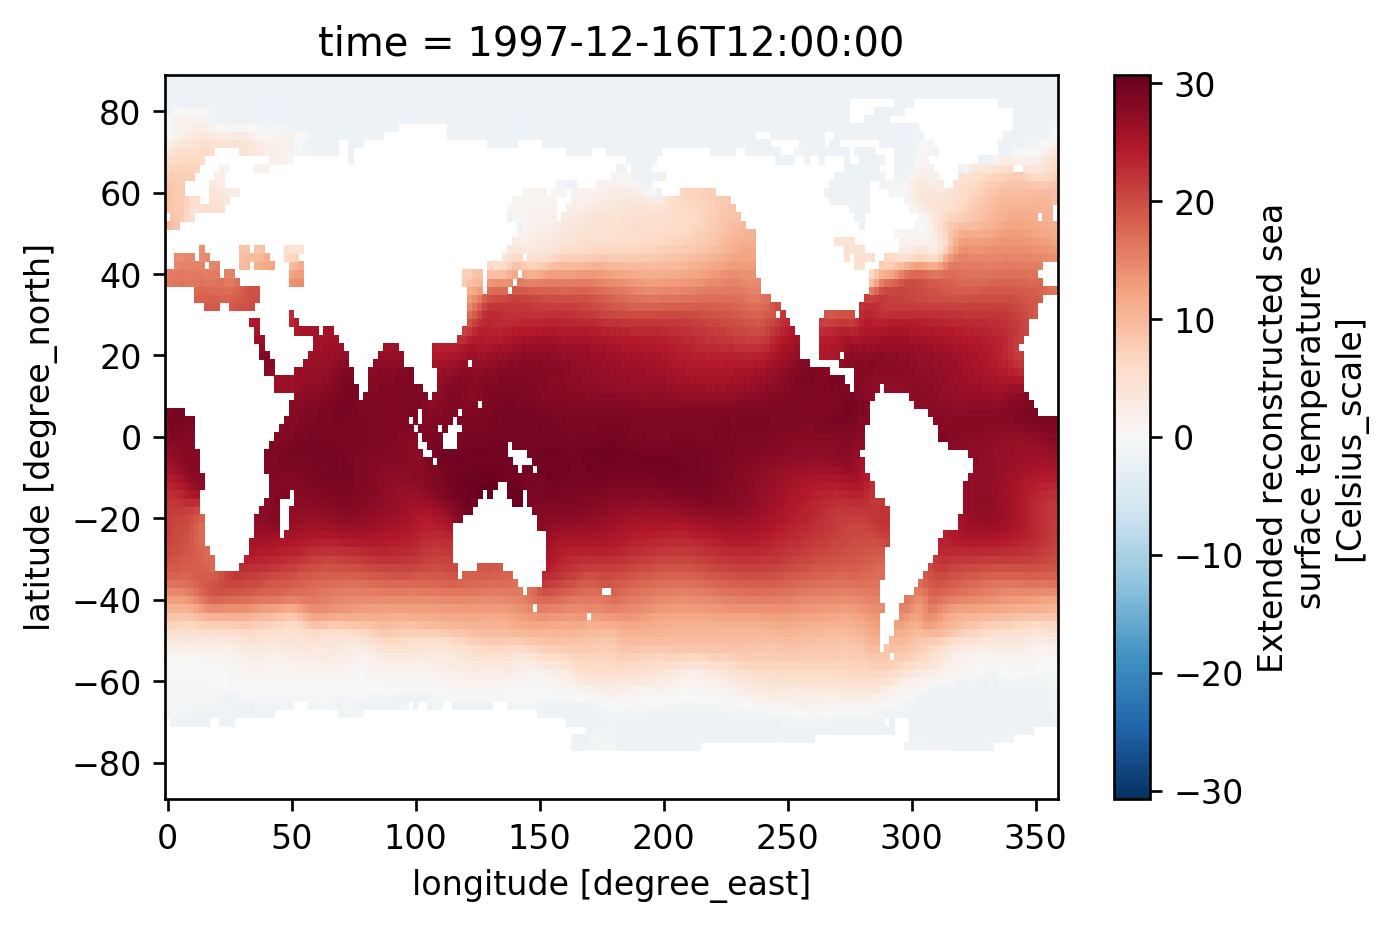

In [6]:
sst.isel(time=227).plot()

More experiments on plotting:
* select date/time explicitly
* change colormap/levels
* contourf/contour


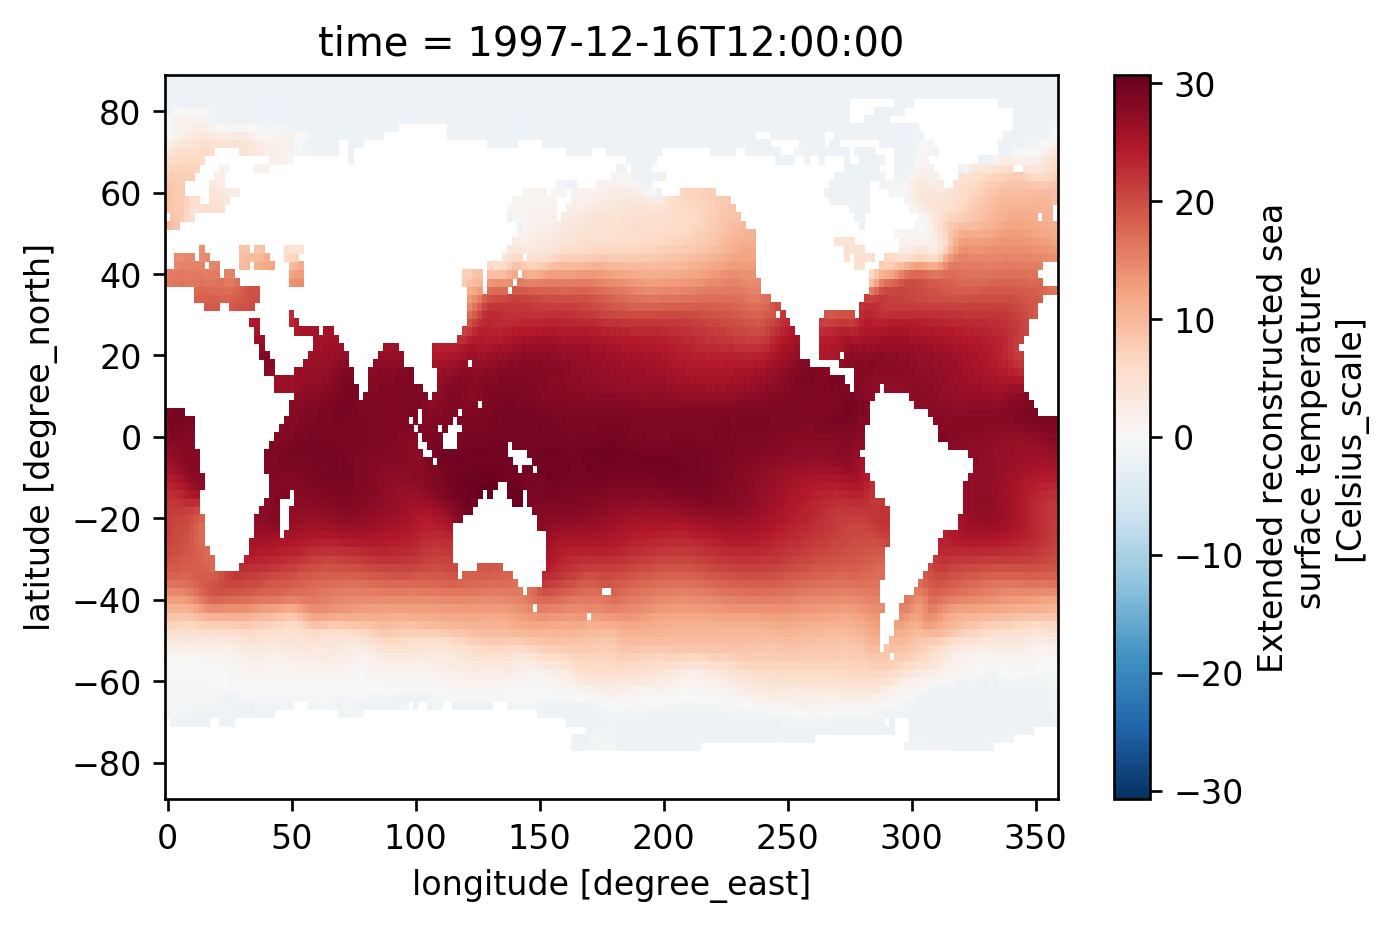

In [7]:
# specify date/time explicitly
# sst.isel(time=227).plot()
sst.sel(time='1997-12-16T12').plot()

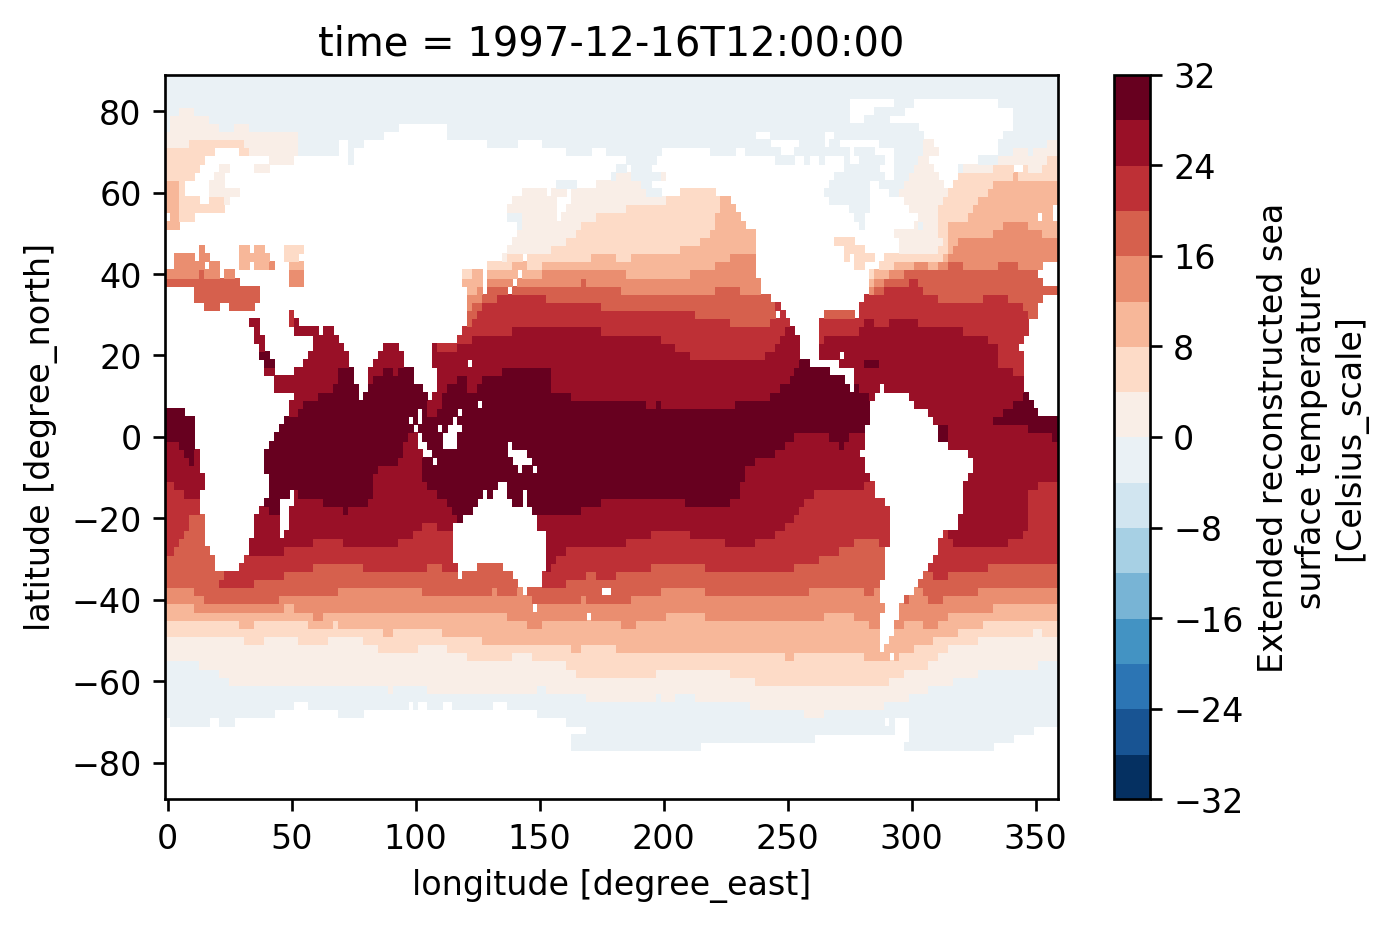

In [8]:
# change levels
sst.sel(time='1997-12-16T12').plot(levels=20)

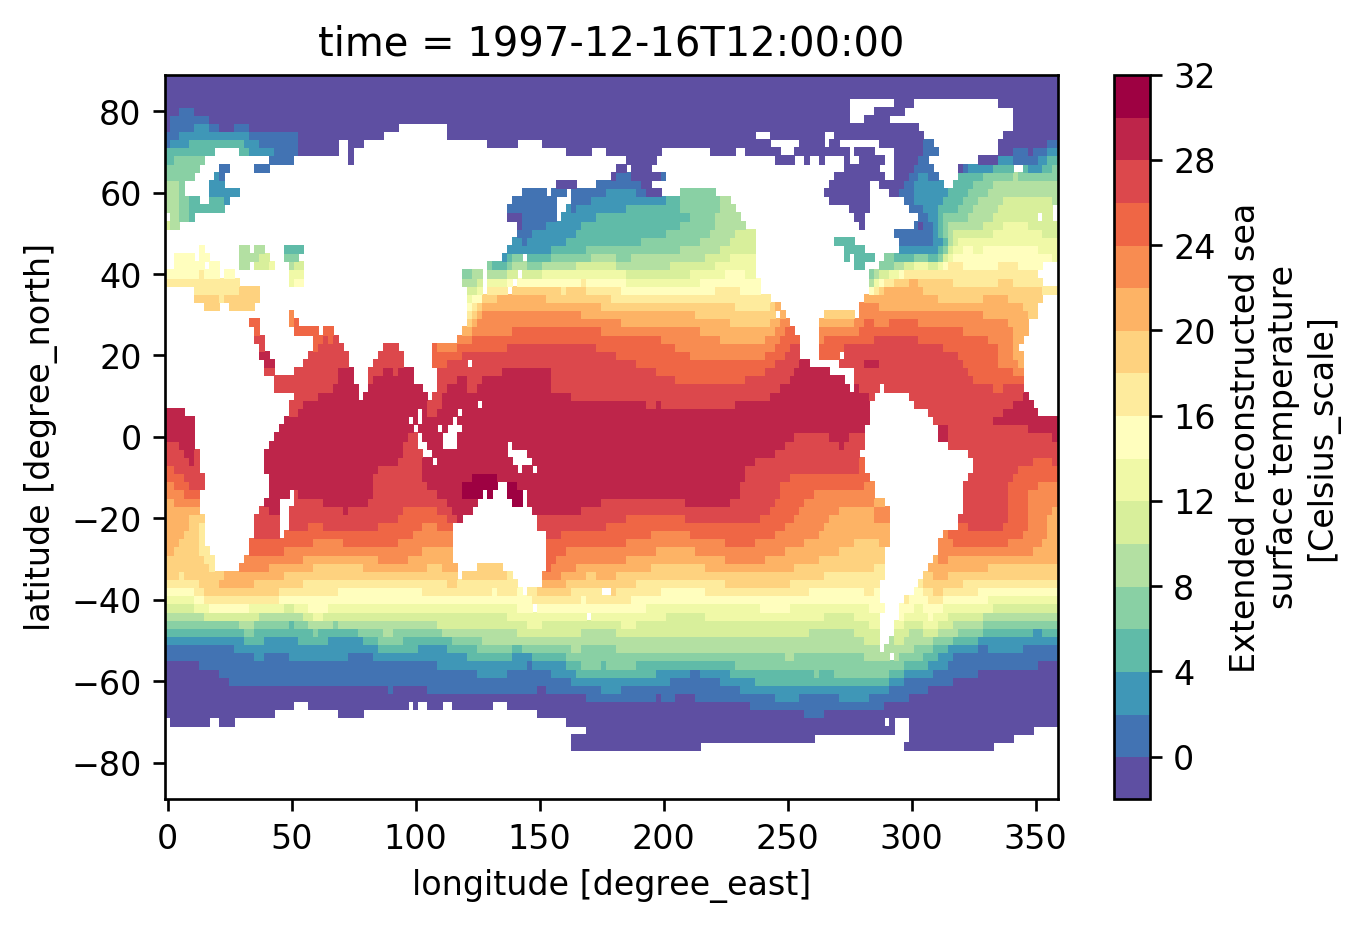

In [9]:
# change color map
sst.sel(time='1997-12-16T12').plot(levels=20, center=False, cmap='Spectral_r')

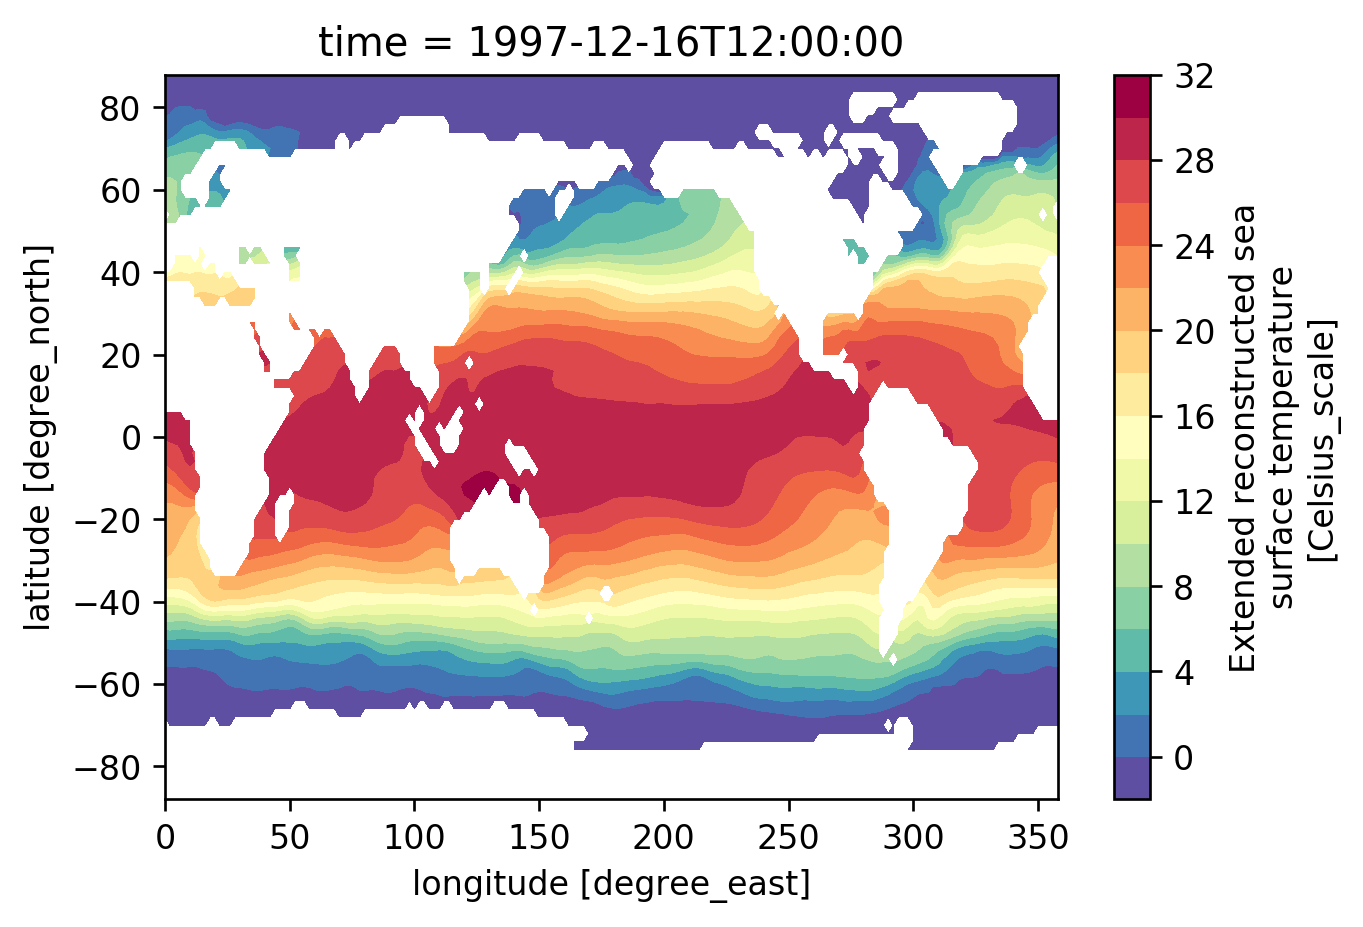

In [10]:
# change to contourf
sst.sel(time='1997-12-16T12').plot.contourf(levels=20, center=False, cmap='Spectral_r')

## SST change from the first 10 years to the last 10 years

In [11]:
sst_early = sst.sel(time=slice('1979-01', '1988-12')).mean('time')
sst_late = sst.sel(time=slice('2009-01', '2018-12')).mean('time')
dsst = sst_late - sst_early
dsst.attrs['long_name'] = 'SST change from 1979-1988 to 2009-2018'
dsst

/Users/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [8.82814328e-05, 1.05879307e-03, 1.67215566e-03, ...,
        7.19108184e-04, 4.69794869e-04, 2.11689870e-04],
       [3.04392974e-03, 3.48090331e-03, 3.78884276e-03, ...,
        8.24495157e-04, 1.91588799e-03, 2.51703660e-03],
       [3.36846908e-03, 3.24251354e-03, 3.17908029e-03, ...,
        2.45412191e-03, 3.06960245e-03, 3.44108244e-03]])
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  SST change from 1979-1988 to 20

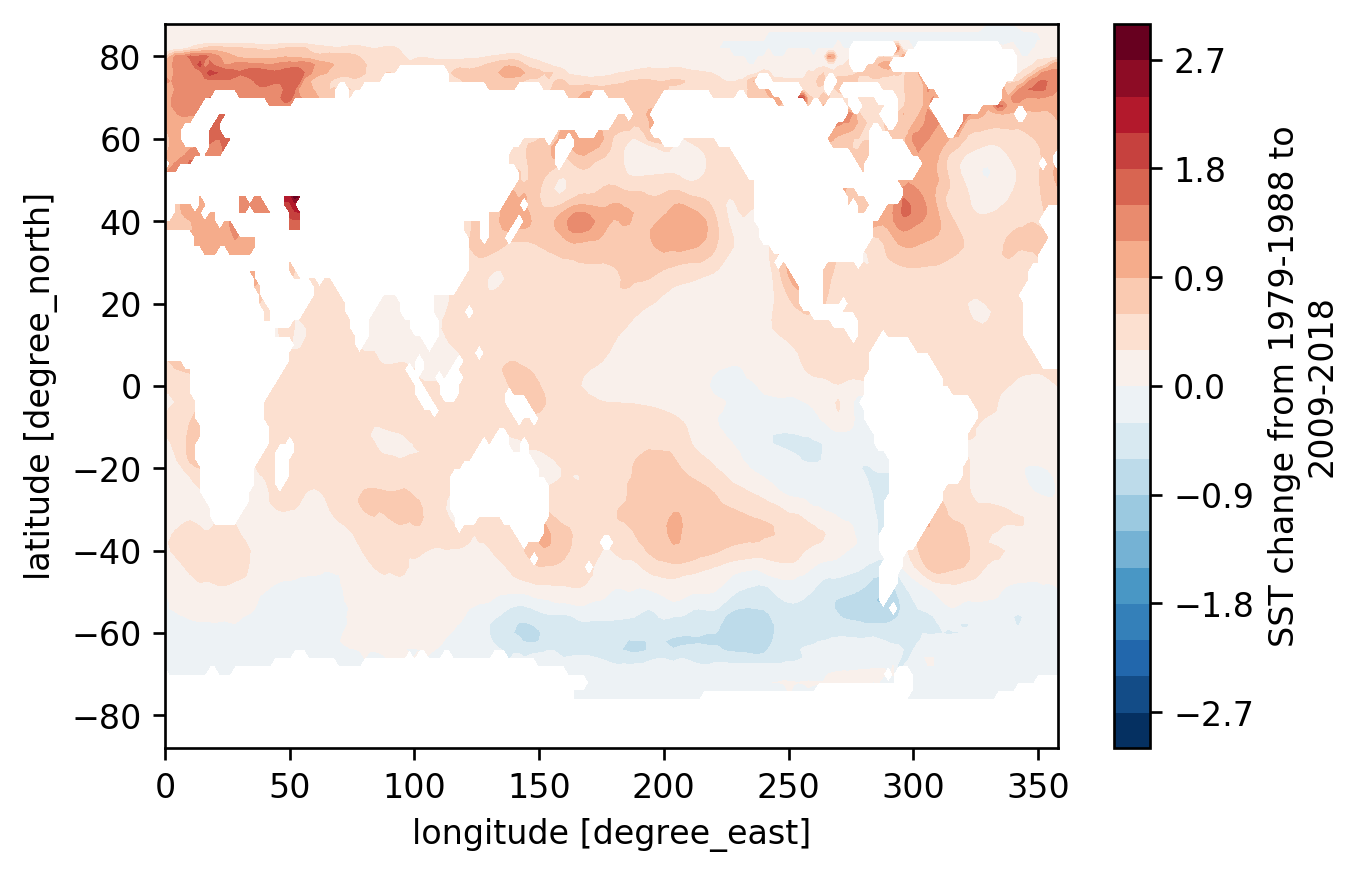

In [12]:
dsst.plot.contourf(levels=20)
# cooling over the Southern Ocean and Southeast Pacific

Not warming everywhere. Southern Ocean and Southeast Pacific

## Calculate monthly climatology
* multiple-year mean value for each month
* use the `groupby('time.month')` method



In [13]:
sst_clim = sst.groupby('time.month').mean('time')
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...

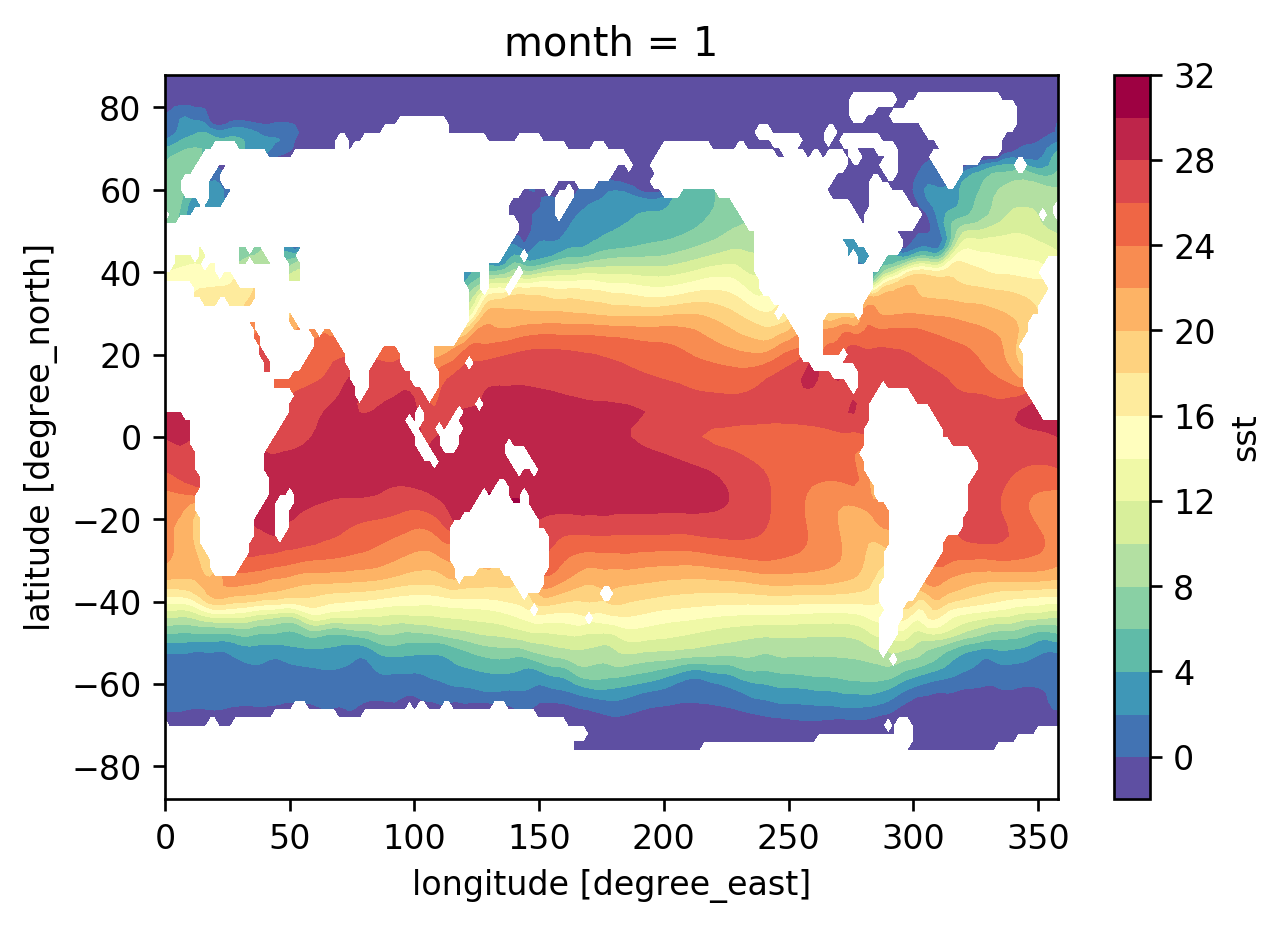

In [14]:
sst_clim.sel(month=1).plot.contourf(levels=20, center=False, cmap='Spectral_r')

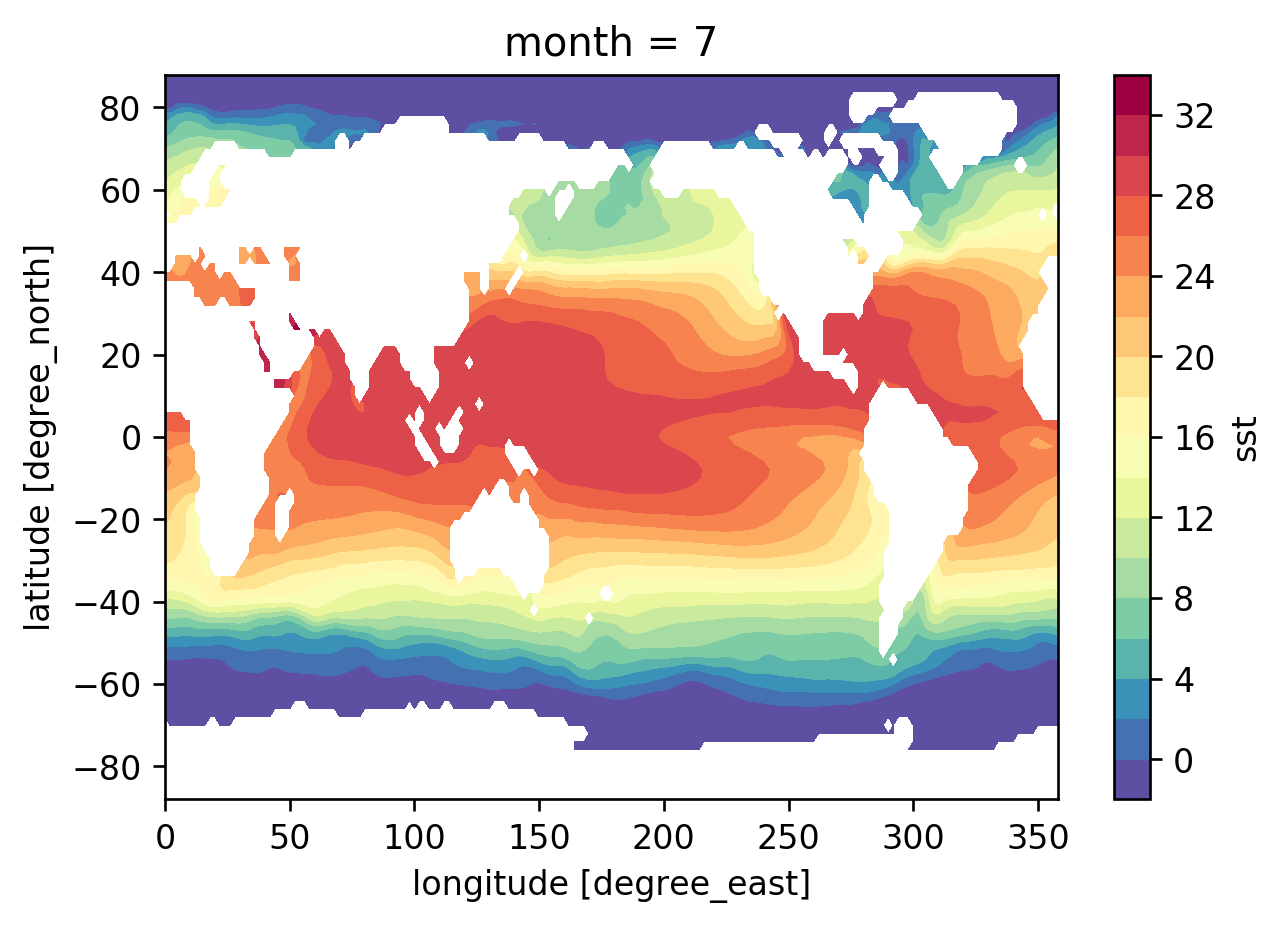

In [15]:
sst_clim.sel(month=7).plot.contourf(levels=20, center=False, cmap='Spectral_r')

Make 12 subplots using a single command.

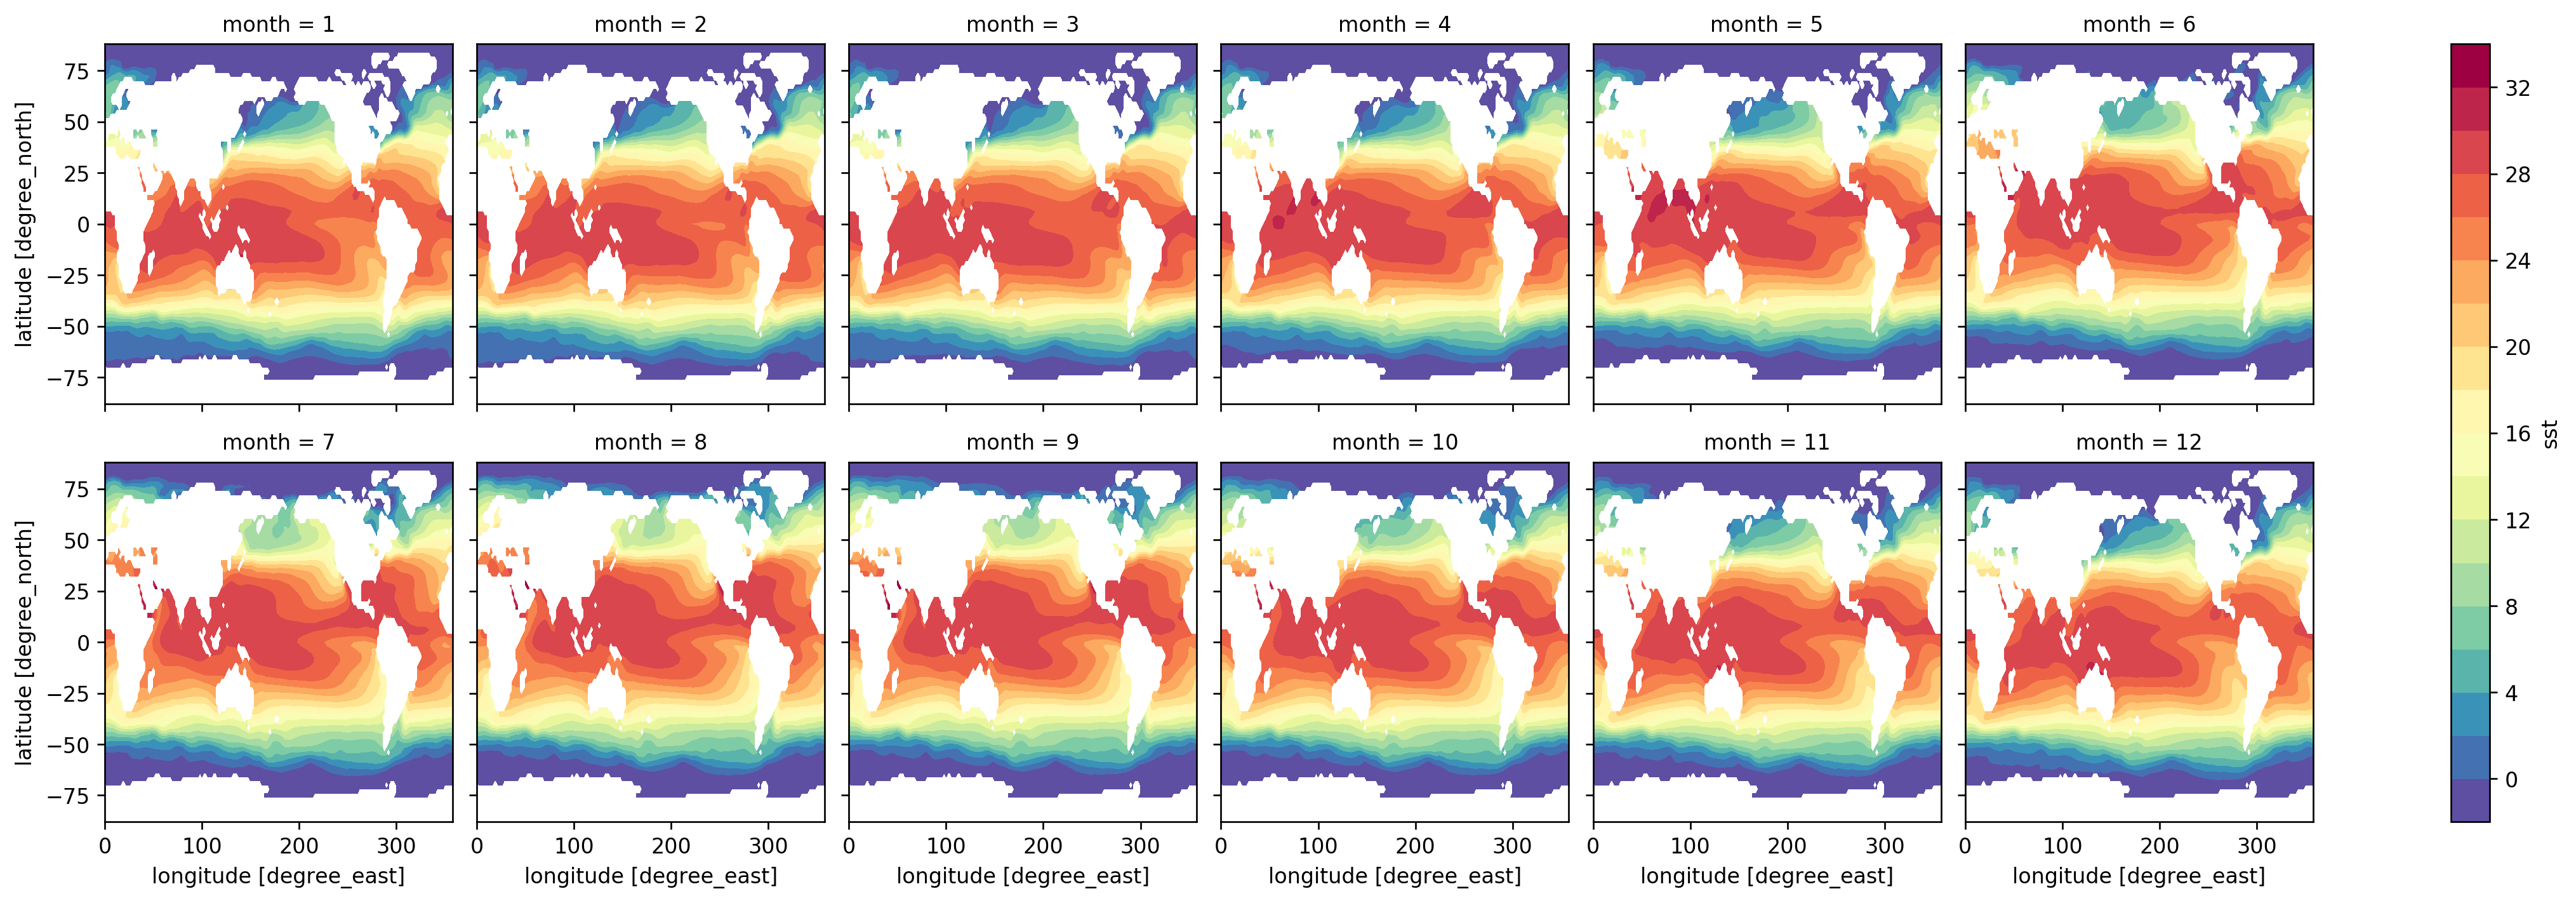

In [16]:
sst_clim.plot.contourf(col='month', col_wrap=6, 
                       levels=20, cmap='Spectral_r', center=False)

## Calculate monthly anomaly
Subtract the monthly climatology from the raw SST data.

In [17]:
ssta = sst.groupby('time.month') - sst_clim
ssta

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...

/Users/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


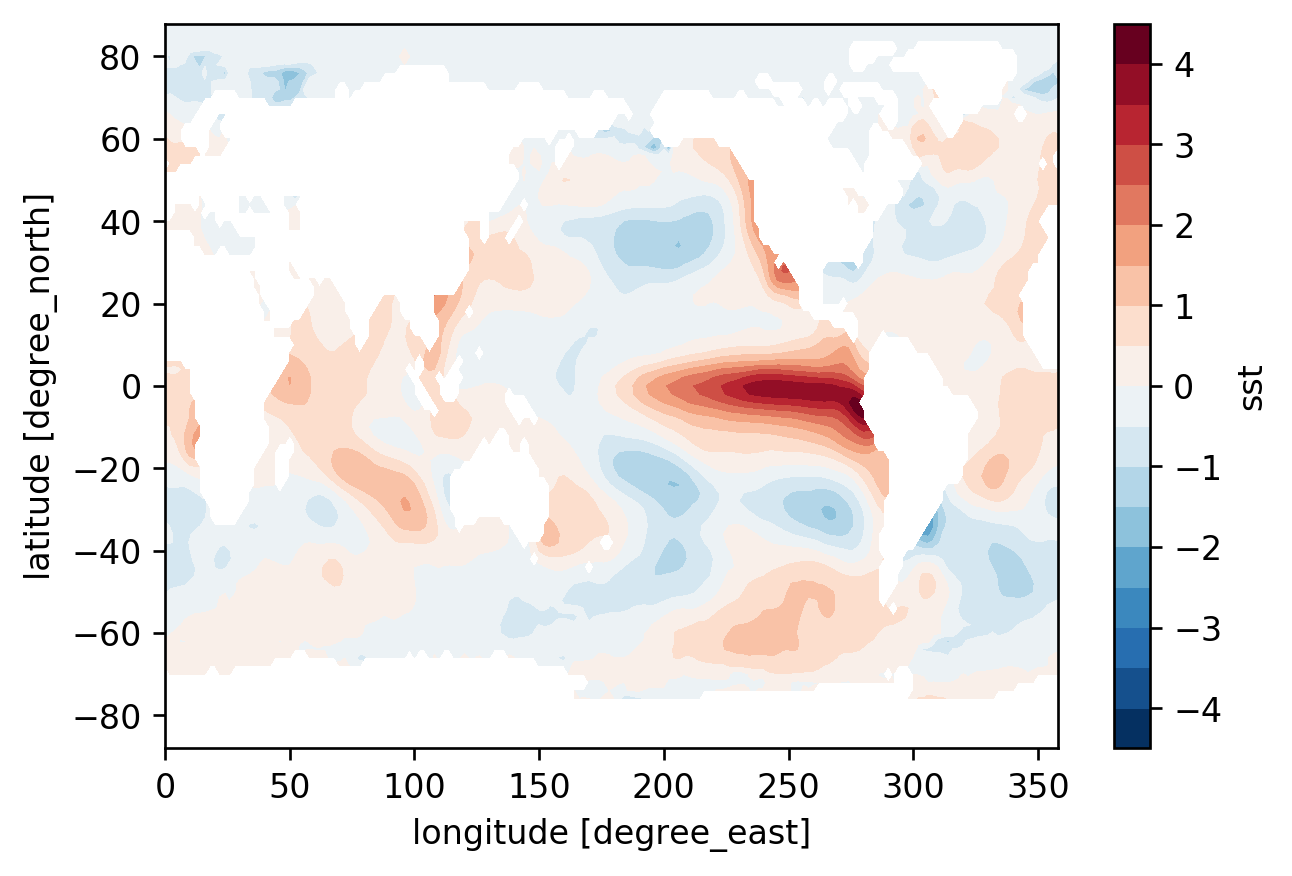

In [18]:
ssta.sel(time=slice('1997-12', '1998-02')).mean('time').plot.contourf(levels=20)

## Calculate the Nino3.4 index
* SST averaged over the Nino3.4 region: 170W-120W, 5S-5N
![ENSO](http://www.bom.gov.au/climate/enso/indices/oceanic-indices-map.gif)
http://www.bom.gov.au/climate/enso/indices/oceanic-indices-map.gif

In [19]:
nino34 = ssta.sel(lon=slice(360-170,360-120),lat=slice(-5,5)).mean(['lon','lat'])
nino34.attrs['long_name'] = 'Nino3.4 index'
nino34

<xarray.DataArray 'sst' (time: 480)>
array([-0.10572306, -0.1836268 ,  0.03708218,  0.10146641, -0.15812588,
       -0.21508427, -0.38624783, -0.09278458,  0.23284168,  0.11522021,
        0.30348017,  0.4949622 ,  0.56535502,  0.25294973,  0.07755121,
        0.01986609,  0.16408358,  0.29021537,  0.01948848, -0.36668521,
       -0.31685382, -0.254546  , -0.08657148,  0.02702146, -0.33399399,
       -0.60326024, -0.57928041, -0.44242506, -0.48998313, -0.38296977,
       -0.56038603, -0.52351305, -0.23649996, -0.29884322, -0.39570199,
       -0.21672897,  0.15579695, -0.12756042,  0.18455473,  0.29487847,
        0.53453409,  0.60759011,  0.44673485,  0.7318162 ,  1.44688625,
        1.97762501,  1.92519011,  2.17057278,  2.36076348,  1.96110801,
        1.42645918,  1.03470378,  0.98781434,  0.62832907, -0.02102205,
       -0.24687294, -0.55387713, -1.14489555, -1.26862349, -1.04344376,
       -0.64377864, -0.15739285, -0.46220417, -0.59383242, -0.6525566 ,
       -0.82345486, -0.4294

Text(1982-12, 2, '1982-12')

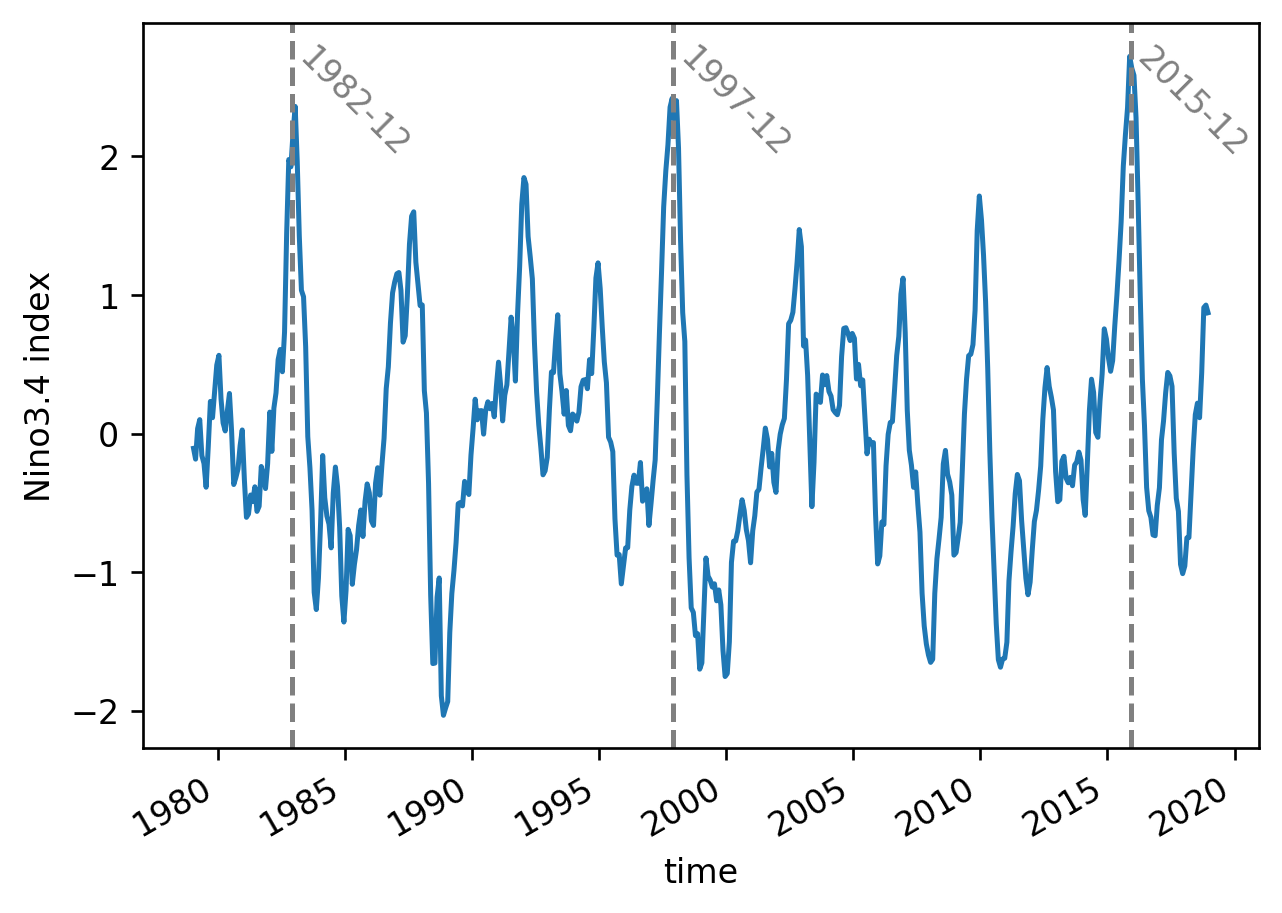

In [20]:
nino34.plot()
plt.axvline('2015-12', color='gray', ls='--')
plt.text('2015-12', 2, '2015-12', rotation=-45, color='gray', )
plt.axvline('1997-12', color='gray', ls='--')
plt.text('1997-12', 2, '1997-12', rotation=-45, color='gray', )
plt.axvline('1982-12', color='gray', ls='--')
plt.text('1982-12', 2, '1982-12', rotation=-45, color='gray', )

## Seasonality of El Nino/La Nina

Text(0, 0.5, 'Nino3.4 standard deviation [$^\\circ$C]')

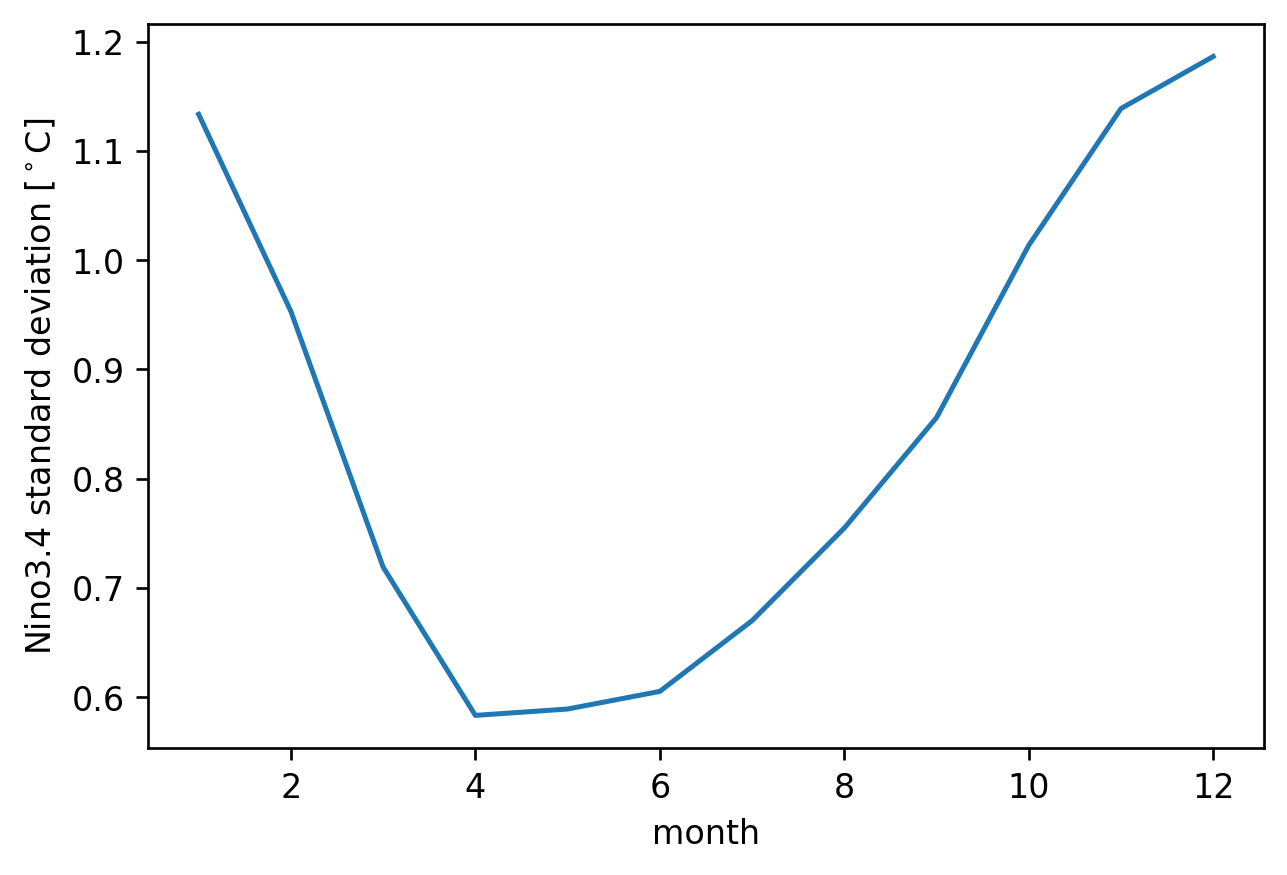

In [21]:
nino34.groupby('time.month').std('time').plot()
plt.ylabel('Nino3.4 standard deviation [$^\circ$C]')

December shows the largest variability!